# Data wrangling
This notebooks is used to import and clean the datasets

In [116]:
DATA_FOLDER = './data/'
MOVIES_FOLDER = DATA_FOLDER + 'movies_summaries/'
PLOT_SUMMARY_FOLDER = DATA_FOLDER + 'corenlp_plot_summaries'
KAGGLE_FOLDER = DATA_FOLDER + 'kaggle/'

REPORT_FOLDER = './gen/reports/'
ETHNICITY_FILE = './gen/ethnicities.tsv'
INFLATION_FILE = './gen/inflation_date'

CHARACTERS_FILE = MOVIES_FOLDER + 'character.metadata.tsv'
MOVIES_FILE = MOVIES_FOLDER + 'movie.metadata.tsv'
PLOT_SUMMARIES_FILE = MOVIES_FOLDER + 'plot_summaries.txt'
TROPES_FILE = MOVIES_FOLDER + 'tvtropes.clusters.txt'
KAGGLE_FILE = KAGGLE_FOLDER + 'movies_metadata.csv'

TARGET_COUNTRIES = ['United States of America']

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# from pandas_profiling import ProfileReport
%matplotlib inline

from data_wrangling_tools import *

# Characters

In [118]:
# load characters
characters = load_characters(CHARACTERS_FILE)
print(characters.shape)
characters.head()

(450669, 10)


,wiki_movie_id,freebase_movie_id,m_release_date,name,a_dob,a_gender,a_height,a_ethnicity_freebase_id,a_name,a_age_at_release
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0


# Ethnicities

In [119]:
# load ethnicities
# Encoding races
# 1 = White
# 2 = Black / African American
# 3 = Asian
# 4 = American Indian / Alaska Native
# 5 = Native Hawaiian / Other Pacific Islander
# 6 = Other (e.g. Aboriginal/Indigenous Australien)

# Encoding Ethnicities:
# - = Not Hispanic or Latino
# + = Hispanic or Latino

ethnicity_clusters = {1: 'White', 2: 'Black / African American', 3: 'Asian', 
    4: 'American Indian / Alaska Native', 5: 'Native Hawaiian / Other Pacific Islander',
    6: 'Other'}

ethnicities = load_ethnicities(ETHNICITY_FILE, ethnicity_clusters)
ethnicities.head()

,freebase_ethnicity_id,ethnicity_name,cluster_id,is_hispanic,ethnicity_cluster_name
0,/m/0x67,African Americans,2,0,Black / African American
1,/m/064b9n,Omaha people,4,0,American Indian / Alaska Native
2,/m/041rx,Jewish people,1,0,White
3,/m/033tf_,Irish Americans,1,0,White
4,/m/04gfy7,Indian Americans,3,0,Asian


In [120]:
# add characters ethnicities
characters = add_characters_ethnicities(characters, ethnicities)
characters.head()

,wiki_movie_id,freebase_movie_id,m_release_date,name,a_dob,a_gender,a_height,a_name,a_age_at_release,a_is_hispanic,a_ethnicity
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,Wanda De Jesus,42.0,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Natasha Henstridge,27.0,NaN,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,Ice Cube,32.0,0.0,Black / African American
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,Jason Statham,33.0,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,Clea DuVall,23.0,NaN,NaN


# Movies

In [121]:
# load movies
movies_cmu = load_movies(MOVIES_FILE)

# clean features    
movies_cmu = clean_unknowns(movies_cmu)
movies_cmu = clean_jsons(movies_cmu)

# select only movies from the US
movies_cmu = filter_with_countries(movies_cmu, TARGET_COUNTRIES, 'any')

print(movies_cmu.shape)
print('The Movies CMU dataset contains movies from {} to {}'.format(int(movies_cmu['release_date'].dt.year.min()), int(movies_cmu['release_date'].dt.year.max())))
movies_cmu.head()

(34408, 9)
The Movies CMU dataset contains movies from 1890 to 2016


,wiki_movie_id,freebase_movie_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930-01-01,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"


# kaggle movies

In [122]:
# import kaggle dataset
movies_kaggle = load_kaggle(KAGGLE_FILE)
print(movies_kaggle.shape)
movies_kaggle.head()

(45463, 6)


,budget,original_title,release_date,revenue,vote_average,vote_count
0,30000000.0,Toy Story,1995-10-30,373554033.0,7.7,5415.0
1,65000000.0,Jumanji,1995-12-15,262797249.0,6.9,2413.0
2,NaN,Grumpier Old Men,1995-12-22,NaN,6.5,92.0
3,16000000.0,Waiting to Exhale,1995-12-22,81452156.0,6.1,34.0
4,NaN,Father of the Bride Part II,1995-02-10,76578911.0,5.7,173.0


# Check whether the kaggle dataset can be trusted
(i.e. contains box office values that we can trust that are the same as the ones in the movies dataset)

In [123]:
df_trust = pd.merge(movies_cmu, movies_kaggle, left_on=[movies_cmu['name'], movies_cmu['release_date'].dt.year], 
                    right_on=[movies_kaggle['original_title'], movies_kaggle['release_date'].dt.year], how='left')
df_trust = df_trust.rename({'release_date_x': 'release_date', 'revenue':'box_office_revenue_kaggle'}, axis=1)
df_trust = df_trust.drop(columns=['original_title', 'key_0', 'key_1', 'release_date_y'])

# select only the rows where the box office revenue is known
df_trust = df_trust[(df_trust['box_office_revenue'].notna()) & (df_trust['box_office_revenue_kaggle'].notna())]

df_trust['box_office_revenue'] = df_trust['box_office_revenue'].astype(float)
df_trust['box_office_revenue_kaggle'] = df_trust['box_office_revenue'].astype(float)

# compare all values
is_same = np.allclose(df_trust['box_office_revenue'].to_numpy(), df_trust['box_office_revenue_kaggle'].to_numpy())

print("Are the values from Kaggle and the values from the movies dataset are the same? {}".format(is_same))

Are the values from Kaggle and the values from the movies dataset are the same? True


# Merge kaggle movies and movies

In [124]:
# merge movies and kaggle movies
movies = merge_movies_kaggle(movies_cmu, movies_kaggle)

print(movies.shape)
movies.head()

(34431, 12)


,wiki_movie_id,freebase_movie_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,budget,vote_average,vote_count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,4.8,299.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi...",NaN,NaN,NaN
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",2000000.0,4.8,6.0
4,175026,/m/017n1p,Sarah and Son,1930-01-01,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]",NaN,NaN,NaN


In [125]:
movies[movies['release_date'].dt.year == movies['release_date'].dt.year.max()]

,wiki_movie_id,freebase_movie_id,name,release_date,box_office_revenue,runtime,languages,countries,genres,budget,vote_average,vote_count
14368,23124260,/m/064mmw7,Jeepers Creepers 4,2016-06-08,NaN,NaN,[Unknown],[United States of America],"[Thriller, Horror]",NaN,NaN,NaN
27292,3139382,/m/08tyfg,Battle Angel,2016-01-01,NaN,NaN,[English Language],[United States of America],"[Thriller, Science Fiction, Action, Romance Film]",NaN,NaN,NaN


In [126]:
# number of nan box office values
nb_nan_movies = movies['box_office_revenue'].isna().sum()
print('Number of known box office values: {} ({:.2%})'.format(movies.shape[0] - nb_nan_movies, (movies.shape[0] - nb_nan_movies) / movies.shape[0]))
print('Number of nan box office values: {} ({:.2%})'.format(nb_nan_movies, nb_nan_movies / movies_cmu.shape[0]))

nb_non_nan_movies = movies_cmu.shape[0] - nb_nan_movies
nb_non_nan_merged_movies = movies.shape[0] - nb_nan_movies
print('Number of box office values gained with kaggle: {} ({:.2%})'.format(nb_non_nan_merged_movies - nb_non_nan_movies, (nb_non_nan_merged_movies - nb_non_nan_movies) / nb_non_nan_movies))

Number of known box office values: 7704 (22.38%)
Number of nan box office values: 26727 (77.68%)
Number of box office values gained with kaggle: 23 (0.30%)


In [127]:
# number of nan release date values
nb_nan_movies = movies['release_date'].isna().sum()
print('Number of known release date values: {} ({:.2%})'.format(movies.shape[0] - nb_nan_movies, (movies.shape[0] - nb_nan_movies) / movies.shape[0]))
print('Number of nan release date values: {} ({:.2%})'.format(nb_nan_movies, nb_nan_movies / movies.shape[0]))

Number of known release date values: 33220 (96.48%)
Number of nan release date values: 1211 (3.52%)


In [128]:
# Filter out movies without box office revenue
movies = movies[movies['box_office_revenue'].notna()]

In [129]:
# number of nan release date values
# Note: here, we see that most movies with box office have a release date too!
nb_nan_movies = movies['release_date'].isna().sum()
print('Number of known release date values: {} ({:.2%})'.format(movies.shape[0] - nb_nan_movies, (movies.shape[0] - nb_nan_movies) / movies.shape[0]))
print('Number of nan release date values: {} ({:.2%})'.format(nb_nan_movies, nb_nan_movies / movies.shape[0]))

Number of known release date values: 7691 (99.83%)
Number of nan release date values: 13 (0.17%)


In [130]:
# Number of budget values
nb_nan_movies = movies['budget'].isna().sum()
print('Number of known release date values: {} ({:.2%})'.format(movies.shape[0] - nb_nan_movies, (movies.shape[0] - nb_nan_movies) / movies.shape[0]))
print('Number of nan release date values: {} ({:.2%})'.format(nb_nan_movies, nb_nan_movies / movies.shape[0]))

Number of known release date values: 3846 (49.92%)
Number of nan release date values: 3858 (50.08%)


In [131]:
# movies[movies['release_date'].isna()].sort_values(by='box_office_revenue', ascending=False)

manual_release_dates = {
    'The Impossible': '2008-07-18',
    'The Outing': '2001-01-01',
    'Into the Spider\'s Web': '2007-08-26',
    'Melissa P.': '2005-01-01',
    'The Lamp': '2000-01-01',
    'The Bear': '2000-01-01',
    'Meatballs III: Summer Job': '1987-01-01',
    'The Steel Trap': '2000-01-01',
    'Angels Die Hard': '2000-01-01',
    'American Cyborg: Steel Warrior': '1993-01-01', 
    'Shattered Image': '1992-01-01',
    'The Ghost of Slumber Mountain': '2000-01-01',
    'Iron Warrior': '1989-01-01'
}

for movie_name, release_date in manual_release_dates.items():
    movies.loc[movies['name'] == movie_name, 'release_date'] = pd.to_datetime(release_date)

assert(movies['release_date'].isna().sum() == 0)

# Add inflation data
Now that we have movies release dates, we can add the inflation data to the dataset. In order to do so, we'll need to import the "inflation_data.csv" file which contains the following inflation data for the U.S., for each year:
* Amount: buying power of 1$ from 1914 in year `n`. In other word, how much 1$ from 1914 is valued in year `n`.
* Inflation rate: inflation rate at each given year

After importing it, use the following formula to compute the value of 1$ from 2016 in every other year:


$bo_{inflation} = \frac{bo_{base}(year_n) * i(year_{2022})}{i(year_n)}$  

In the cell below, we already the factor to get the value of the box office in year `n` to the 2022 budget.

In [132]:
inflation = pd.read_csv(DATA_FOLDER + 'inflation_data.csv', index_col='year')
inflation = inflation.rename(columns={'amount': 'amount_1900'})	

reference_year = 2022
inflation_reference_year = inflation.loc[reference_year, 'amount_1900']

inflation['amount_2022'] = inflation['amount_1900'].apply(lambda x: inflation_reference_year / x)
inflation.head()

,amount_1900,inflation rate,amount_2022
year,,,
1900,1.00,0.01,35.480000
1901,1.01,0.01,35.128713
1902,1.02,0.01,34.784314
1903,1.05,0.02,33.790476
1904,1.06,0.01,33.471698


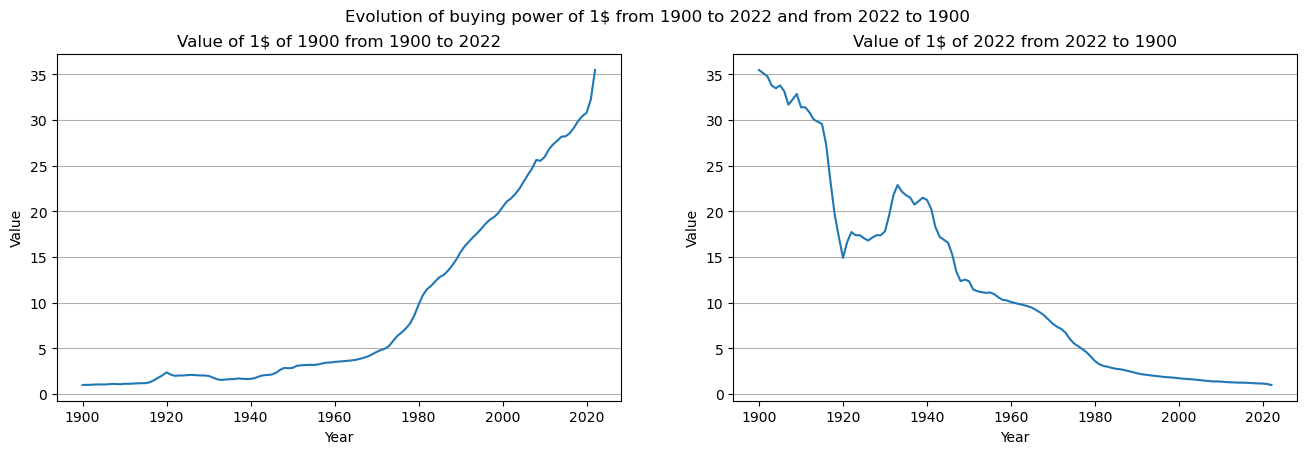

Now, we apply the inflation to the box office revenue. We store it in the `box_office_inflation` column.

In [134]:
movies['box_office_inflation'] = movies.apply(lambda x: x['box_office_revenue'] * inflation.loc[x['release_date'].year, 'amount_2022'], axis=1)

# Box office Evolution
Now that the inflation is contained in the data, we can compare the evolution of the movies box office revenue over the years based on different values: 
* The average box office revenue for each year, with and without inflation
* The largest box office revenue for each year, with and without inflation

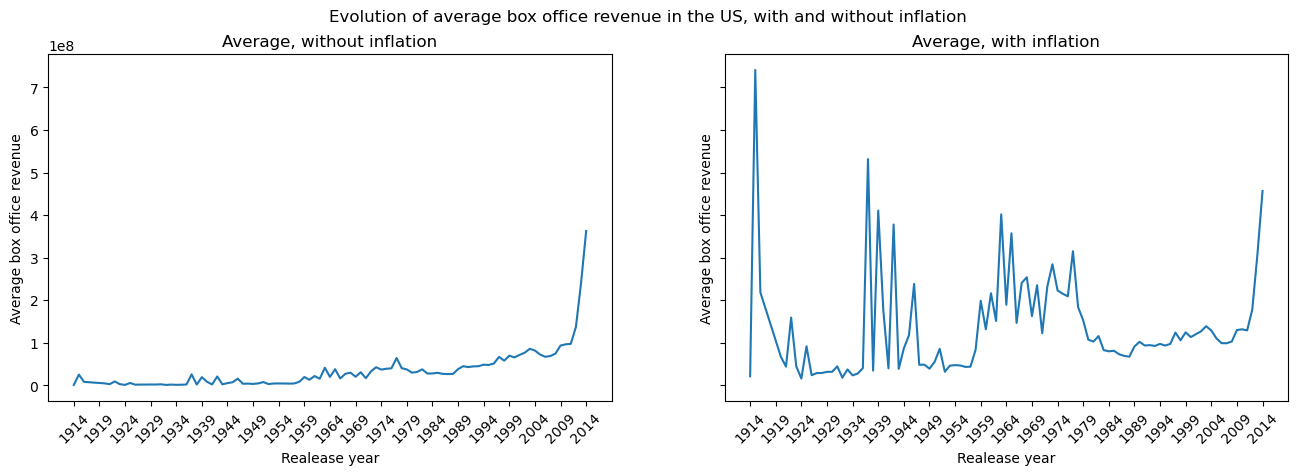

In [166]:
def plot_box_office(df, ax, box_office_column, metrics, title, ylabel):   
    """
        metrics: 'mean' or 'max'
    """ 
    ax.plot(df[box_office_column][metrics])
    ax.set_title(title)
    ax.set_xlabel('Realease year')
    ax.set_ylabel(ylabel)

    plt.sca(ax)
    plt.xticks(np.arange(1914, 2015, 5), rotation=45) # np.arange(1914, 2015, 5), 

box_office_year = movies.groupby(movies['release_date'].dt.year)[['box_office_revenue', 'box_office_inflation']].agg(['mean', 'max']).sort_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 4.5), sharex=True, sharey=True)

fig.suptitle('Evolution of average box office revenue in the US, with and without inflation')

plot_box_office(box_office_year, ax[0], 'box_office_revenue', 'mean', 'Average, without inflation', 'Average box office revenue')
plot_box_office(box_office_year, ax[1], 'box_office_inflation', 'mean','Average, with inflation', 'Average box office revenue')

plt.show()

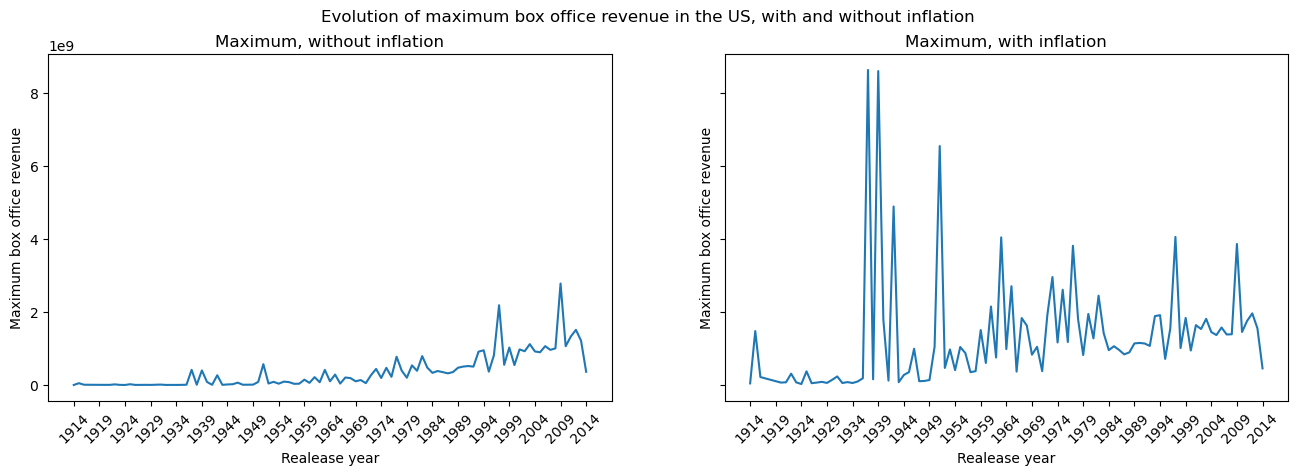

In [167]:

fig, ax = plt.subplots(1, 2, figsize=(16, 4.5), sharex=True, sharey=True)

fig.suptitle('Evolution of maximum box office revenue in the US, with and without inflation')

plot_box_office(box_office_year, ax[0], 'box_office_revenue', 'max','Maximum, without inflation', 'Maximum box office revenue')
plot_box_office(box_office_year, ax[1], 'box_office_inflation', 'max','Maximum, with inflation', 'Maximum box office revenue')

plt.show()

In [177]:
movies.sort_values(by='box_office_inflation', ascending=False)[['name', 'release_date', 'box_office_revenue', 'box_office_inflation']].head(10)

,name,release_date,box_office_revenue,box_office_inflation
5056,Snow White and the Seven Dwarfs,1937-12-21,4.160000e+08,8.631392e+09
15981,Gone with the Wind,1939-12-15,4.000000e+08,8.601212e+09
23794,Alice in Wonderland,1951-07-26,5.720000e+08,6.546632e+09
524,Bambi,1942-08-08,2.674472e+08,4.891250e+09
9403,Titanic,1997-11-01,2.185372e+09,4.057405e+09
2971,Love with the Proper Stranger,1963-12-25,4.150049e+08,4.045157e+09
10025,Avatar,2009-12-10,2.782275e+09,3.865118e+09
34033,Star Wars Episode IV: A New Hope,1977-05-25,7.753980e+08,3.815689e+09
9984,The Exorcist,1973-06-19,4.410710e+08,2.958261e+09
18394,The Sound of Music,1965-03-02,2.862143e+08,2.707969e+09


# Merge characters and movies

In [ ]:
# merge characters and movies
df = merge_characters_movies(characters, movies)
df.head()

In [ ]:
# generate clean df
df1 = generate_clean_df_with_kaggle(CHARACTERS_FILE, ETHNICITY_FILE, MOVIES_FILE, KAGGLE_FILE, ethnicity_clusters)

assert(df.equals(df1))
df1.head()